# Descriptive Statistics and Python Implementation😧

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("data.csv")
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [51]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


## Descriptive Statistics

>Descriptive Statistics is summarizing the data at hand through certain numbers like mean, median etc. so as to make the understanding of the data easier. It does not involve any generalization or inference beyond what is available. This means that the descriptive statistics are just the representation of the data (sample) available and not based on any theory of probability.

### Commonly Used Measures

>1. **Measures of Central Tendency**
>1. **Measures of Dispersion (or Variability)**

![Alt Text](https://www.sixsigma-institute.org/sixsigma_images/areas_of_interest_for_descriptive_statistics.jpg)

### Measures of Central Tendency

>**Mean :** Mean is defined as the ratio of the sum of all the observations in the data to the total number of observations. This is also known as Average. Thus mean is a number around which the entire data set is spread.

$$\mu = \frac{1}{N}\sum_{i=0}^{N} x_{i}$$

In [42]:
#to find mean of single column
print(df['Mthly_HH_Income'].mean())

41558.0


In [6]:
def mean1():
    for i in df.columns:
        sum=0
        c=0
        if df[i].dtypes!='O':
            for j in df[i]:
                sum+=j
                c+=1
            print("Mean of",i,sum/c)
mean1()

Mean of Mthly_HH_Income 41558.0
Mean of Mthly_HH_Expense 18818.0
Mean of No_of_Fly_Members 4.06
Mean of Emi_or_Rent_Amt 3060.0
Mean of Annual_HH_Income 490019.04
Mean of No_of_Earning_Members 1.46


>**Median :** Median is the point which divides the entire data into two equal halves. One-half of the data is less than the median, and the other half is greater than the same. Median is calculated by first arranging the data in either ascending or descending order.

>* If the number of observations are odd, median is given by the middle observation in the sorted form.
>* If the number of observations are even, median is given by the mean of the two middle observation in the sorted form.

$$
Median = \left\{
    \begin{array}\\
        \frac{(N+1)}{2} & \mbox{if N is Odd } \\
        \frac{\frac{N}{2}+\frac{(N+1)}{2}}{2} & \mbox{if N is Even} \\       
    \end{array}
\right.
$$

In [43]:
# to find median of single column
print(df['Mthly_HH_Income'].median())

35000.0


In [32]:
from collections import Counter
for x in df.columns:
    m=len(df[x])
    n=sorted(df[x])
    if df[x].dtypes!="O":
        if m%2==0:
            print("Median of",x,(n[(m-1)//2]+n[m//2])/2)
        else:
            print("Median of ",x,(n[i][n]))

Median of Mthly_HH_Income 35000.0
Median of Mthly_HH_Expense 15500.0
Median of No_of_Fly_Members 4.0
Median of Emi_or_Rent_Amt 0.0
Median of Annual_HH_Income 447420.0
Median of No_of_Earning_Members 1.0


>**Mode :** Mode is the number which has the maximum frequency in the entire data set, or in other words,mode is the number that appears the maximum number of times. A data can have one or more than one mode.

In [44]:
#to find mode of a single colomn use
print(df['Mthly_HH_Income'].mode())

0    45000
dtype: int64


In [8]:
from collections import Counter
for i in df.columns:
    n = len(df[i])
    data = Counter(df[i])
    get_mode = dict(data)
    mode = [k for k , v in get_mode.items() if v == max(list(data.values()))]

    if len(mode) == n:
        get_mode = "no mode found"
    else:
        get_mode = "mode is : " + ','.join(map(str,mode))

    print(get_mode)

mode is : 45000
mode is : 25000
mode is : 4
mode is : 0
mode is : 590400
mode is : Graduate
mode is : 1


### Measures of Dispersion (or Variability)

>**Variance :**Variance measures how far are data points spread out from the mean. A high variance indicates that data points are spread widely and a small variance indicates that the data points are closer to the mean of the data set.

$$\sigma^2 = \frac{1}{N}\sum_{i=0}^{N} (x_{i}-{\bar x})^2$$

In [45]:
#to find Variance of a single colomn use
print(df['Mthly_HH_Income'].var())

681100853.0612245


In [9]:
for i in df.columns:
    if df[i].dtypes != 'O':
        mean=df[i].mean()
        sum=0
        for j in df[i]:
            sum=sum+(j-mean)**2
            variance=sum/(len(df[i])-1)
        print("Variance of ",i,"is ",variance)

Variance of  Mthly_HH_Income is  681100853.0612245
Variance of  Mthly_HH_Expense is  146173342.85714287
Variance of  No_of_Fly_Members is  2.302448979591837
Variance of  Emi_or_Rent_Amt is  38955510.20408163
Variance of  Annual_HH_Income is  102486925397.91666
Variance of  No_of_Earning_Members is  0.5391836734693878


>**Standard Deviation :** The square root of Variance is called the Standard Deviation

$$\sigma = \sqrt{\frac{1}{N}\sum_{i=0}^{N} (x_{i}-{\bar x})^2}$$

In [46]:
#to find Standard deviation of a single colomn use
print(df['Mthly_HH_Income'].std())

26097.908978713687


In [10]:
import math
for i in df.columns:
    if df[i].dtypes != 'O':
        mean=df[i].mean()
        sum=0
        for j in df[i]:
            sum=sum+(j-mean)**2
            variance=sum/(len(df[i])-1)
            std = math.sqrt(variance)
        print("Standard deviation of ",i,"is ",std)

Standard deviation of  Mthly_HH_Income is  26097.908978713687
Standard deviation of  Mthly_HH_Expense is  12090.216824240286
Standard deviation of  No_of_Fly_Members is  1.5173822786601394
Standard deviation of  Emi_or_Rent_Amt is  6241.434947516607
Standard deviation of  Annual_HH_Income is  320135.79212252516
Standard deviation of  No_of_Earning_Members is  0.7342912729083656


### Correlation

>A correlation is a statistical measure of the relationship between two variables. The measure is best used in variables that demonstrate a linear relationship between each other. The fit of the data can be visually represented in a scatterplot.

>The correlation coefficient is a value that indicates the strength of the relationship between variables. The coefficient can take any values from -1 to 1. The interpretations of the values are:

>* -1: Perfect negative correlation. The variables tend to move in opposite directions (i.e., when one variable increases, the other variable decreases).
>* 0: No correlation. The variables do not have a relationship with each other.
>* 1: Perfect positive correlation. The variables tend to move in the same direction (i.e., when one variable increases, the other variable also increases).

$$r_{xy} = \frac{{\sum{(x_{i}-{\bar x})(y_{i}-{\bar y})}}}{{\sum{(x_{i}-{\bar x})^2}{\sum(y_{i}-{\bar y})^2}}}$$

![Alt Text](https://www.simplypsychology.org/correlation.jpg?ezimgfmt=rs:535x378/rscb24/ng:webp/ngcb24 "Optional Title")


![Alt Text](https://www.mathsisfun.com/data/images/correlation-examples.svg "Correlation")

In [11]:
def mean_fun(a):
    sum = 0
    n = 0
    for j in a:
        sum = sum+j
        n =n+1
    return (sum/n)

In [12]:
import math
def std_fun(a):
    sum = 0
    b = mean_fun(a)
    for j in a:
        sum = sum + ((j-b)**2)
    return (math.sqrt(sum/len(df)))

In [13]:
def covariance_f(a,b):
    sum = 0
    x = mean_fun(a)
    y = mean_fun(b)
    for i in range(len(a)):
        sum = sum + ((a[i]-x)*(b[i]-y))
    return sum/len(a)


In [14]:
covariance_f(df['Mthly_HH_Income'],df['Mthly_HH_Expense'])

200749556.0

In [15]:
def correlation_fun(a,b):
    return covariance_f(a,b)/(std_fun(a)*std_fun(b))

In [16]:
l1 = []
for i in df.columns:
    if df[i].dtypes != 'O':
        l1.append(i)
a = l1[0]
for i in l1:
    if(a!=i):
        print("correlation between",a, i +"is",correlation_fun(df[a],df[i]))

correlation between Mthly_HH_Income Mthly_HH_Expenseis 0.6492152549316462
correlation between Mthly_HH_Income No_of_Fly_Membersis 0.4483173135943263
correlation between Mthly_HH_Income Emi_or_Rent_Amtis 0.03697611093890592
correlation between Mthly_HH_Income Annual_HH_Incomeis 0.9703154166603717
correlation between Mthly_HH_Income No_of_Earning_Membersis 0.34788345602238374


### Normal Distribution

> The normal distribution is a continuous probability distribution that is symmetrical on both sides of the mean, so the right side of the center is a mirror image of the left side.

> The normal distribution is often called the bell curve because the graph of its probability density looks like a bell.

## $$f(x) = \frac{1}{\sigma\sqrt{(2\pi)}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

> #### All forms of (normal) distribution share the following characteristics:
>* It is symmetric. A normal distribution comes with a perfectly symmetrical shape.
>* The mean, median, and mode are equal. 
>* Empirical rule. 
>* Skewness and kurtosis.

![Alt Text](https://qph.fs.quoracdn.net/main-qimg-f5d9ab6893805c8bd9321ade02a13021)

### Features of Normal Distribution

>### 1. It is symmetric
A normal distribution comes with a perfectly symmetrical shape. This means that the distribution curve can be divided in the middle to produce two equal halves. The symmetric shape occurs when one-half of the observations fall on each side of the curve.

>### 2. The mean, median, and mode are equal
The middle point of a normal distribution is the point with the maximum frequency, which means that it possesses the most observations of the variable. The midpoint is also the point where these three measures fall. The measures are usually equal in a perfectly (normal) distribution.

>### 3. Empirical rule
In normally distributed data, there is a constant proportion of distance lying under the curve between the mean and specific number of standard deviations from the mean. For example, 68.25% of all cases fall within +/- one standard deviation from the mean. 95% of all cases fall within +/- two standard deviations from the mean, while 99% of all cases fall within +/- three standard deviations from the mean.

>### 4. Skewness and kurtosis
Skewness and kurtosis are coefficients that measure how different a distribution is from a normal distribution. Skewness measures the symmetry of a normal distribution while kurtosis measures the thickness of the tail ends relative to the tails of a normal distribution.

### Positively Skewed

>Positively Skewed Distribution is a type of distribution where the mean, median and mode of the distribution are positive rather than negative or zero i.e., data distribution occurs more on the one side of the scale with long tail on the right side. It is also known as the right-skewed distribution, where the mean is generally there to the right side of the median of the data.

![Alt Text](https://miro.medium.com/max/555/1*d318NxKHGZgWTHvKjbzJ_g.jpeg)

>### Here you can see the positions of all the three measures on the plot. So, you will find that:
>* mean greater than the mode
>* median greater than the mode
>* mean greater than median

### Negatively Skewed

>Negatively skewed distribution refers to the distribution type where the more values are plotted on the right side of the graph, where the tail of the distribution is longer on the left side and the mean is lower than the median and mode which it might be zero or negative due to the nature of the data as negatively distributed.

![Alt Text](https://miro.medium.com/max/576/1*zMSuf2Y_DFjdQzMrKU-oGQ.jpeg)

>### Here you can see three measures position on the plot. So, you will find that:
>* mean less than the mode
>* median less than the mode
>* mean less than median

### Effect on Mean, Median and Mode due to Skewness

> In a positively skewed distribution the outliers will be pulling the mean down the scale a great deal. The median might be slightly lower due to the outlier, but the mode will be unaffected. Thus, with a negatively skewed distribution the mean is numerically lower than the median or mode

# QQ Plot and show the implementation of the same

>The **quantile-quantile (q-q)** plot is a graphical technique for determining if two data sets come from populations with a common distribution. A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set.  
>* The normal distribution is symmetric, so it has no skew (the mean is equal to the median). On a Q-Q plot normally distributed data appears as roughly a straight line (although the ends of the Q-Q plot often start to deviate from the straight line).

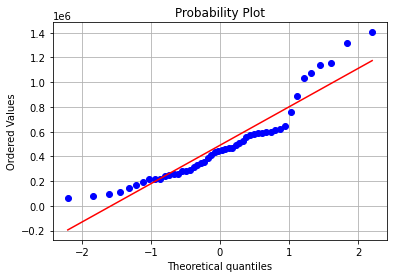

In [18]:
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(df['Annual_HH_Income'],dist="norm", plot=plt)
plt.grid()

#  Box Cox and show the implementation of the same

>Boxcox for performing box-cox power transformation that takes in original non-normal data as input and returns fitted data along with the lambda value that was used to fit the non-normal distribution to normal distribution

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/20200531232546/output275.png)

In [26]:
#implementation

In [39]:
l,bcx=stats.boxcox(df['Annual_HH_Income'])
print(bcx)

0.24689401204475175


((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([ 58.24293824,  61.70421582,  64.96005249,  67.54329643,
          72.38061027,  74.8726426 ,  78.06452764,  79.99898498,
          80.27429016,  80.45631493,  82.63682662,  82.74154791,
          83.76816466,  84.01918284,  85.43373762,  85.54779027

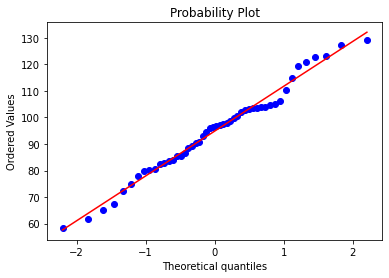

In [40]:
stats.probplot(l,dist='norm',plot=plt)

>## comapring both the plots..thus we can say boxcox has transformed non normal data into normal data

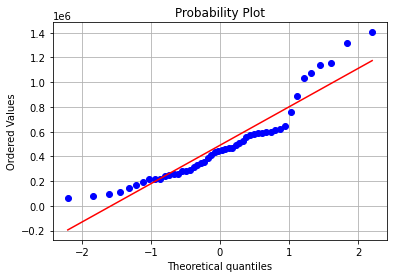 
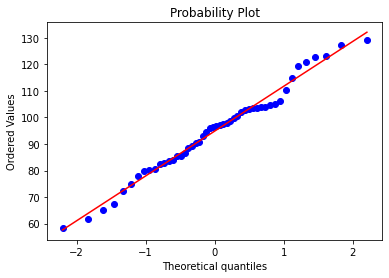